<a href="https://colab.research.google.com/github/krishnakantsingh14/DeepLearning/blob/master/L_1_1_6_S191.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
tf.enable_eager_execution()

In [0]:
# Alternatively


import numpy as np
import os
#@markdown This sets the styles of the plotting (default is styled like plots from [FiveThirtyeight.com](https://fivethirtyeight.com/))
matplotlib_style = 'fivethirtyeight' #@param ['fivethirtyeight', 'bmh', 'ggplot', 'seaborn', 'default', 'Solarize_Light2', 'classic', 'dark_background', 'seaborn-colorblind', 'seaborn-notebook']
import matplotlib.pyplot as plt; plt.style.use(matplotlib_style)
import matplotlib.axes as axes;
from matplotlib.patches import Ellipse
%matplotlib inline
import seaborn as sns; sns.set_context('notebook')
from IPython.core.pylabtools import figsize
#@markdown This sets the resolution of the plot outputs (`retina` is the highest resolution)
notebook_screen_res = 'retina' #@param ['retina', 'png', 'jpeg', 'svg', 'pdf']
%config InlineBackend.figure_format = notebook_screen_res

import tensorflow as tf
# tfe = tf.contrib.eager

# Eager Execution
#@markdown Check the box below if you want to use [Eager Execution](https://www.tensorflow.org/guide/eager)
#@markdown Eager execution provides An intuitive interface, Easier debugging, and a control flow comparable to Numpy. You can read more about it on the [Google AI Blog](https://ai.googleblog.com/2017/10/eager-execution-imperative-define-by.html)
use_tf_eager = True #@param {type:"boolean"}

# Use try/except so we can easily re-execute the whole notebook.
if use_tf_eager:
    try:
        tf.enable_eager_execution()
    except:
        pass

In [0]:
is_correct_tf_version = '1.13.' in tf.__version__
assert is_correct_tf_version, "Wrong tensorflow version {} installed".format(tf.__version__)

is_eager_enabled = tf.executing_eagerly()
assert is_eager_enabled,      "Tensorflow eager mode is not enabled"

In [0]:
a= tf.constant(5, name="a")

In [0]:
b = tf.constant(4, name="b")

In [9]:
b


<tf.Tensor: id=2, shape=(), dtype=int32, numpy=4>

In [0]:
c = tf.add(a,b, name="c")

In [13]:
print (c)

tf.Tensor(9, shape=(), dtype=int32)


In [0]:
def graph(a,b):
    '''construct a computation graph'''
    c = tf.add(a,b, name="c");
    d = tf.subtract(b, 1, name="d")
    e = tf.multiply(c,d, name="e")
    return e

In [18]:
a, b = 1.5, 2.5
# Execute the computation
e_out = graph(a,b)
print (e_out)

tf.Tensor(6.0, shape=(), dtype=float32)


In [19]:
(1.5+2.5)*(1.5)

6.0

In [0]:
# n_in: number of inputs
# n_out: number of outputs
def our_dense_layer(x, n_in, n_out):
  # Define and initialize parameters, a weight matrix W and biases b
  W = tf.Variable(tf.ones((n_in, n_out)))
  print (W.shape)
  b = tf.Variable(tf.zeros((1, n_out)))
  
  '''TODO: define the operation for z (hint: use tf.matmul)'''
  z = tf.matmul(x,W) + b
  
  '''TODO: define the operation for out (hint: use tf.sigmoid)'''
  out = tf.sigmoid(z)
  return out

In [35]:
x = tf.constant([[1.,2.]], shape=(1,2))
print (x.shape)
# 

(1, 2)


In [37]:
print (our_dense_layer(x, n_in=2, n_out=3))

(2, 3)
Instructions for updating:
Colocations handled automatically by placer.
tf.Tensor([[0.95257413 0.95257413 0.95257413]], shape=(1, 3), dtype=float32)


In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [0]:
n_input_node = 2
n_output_node = 3

In [0]:
model = Sequential()

In [0]:
'''TODO: Define a dense (fully connected) layer to compute z'''
# Remember: dense layers are defined by the parameters W and b!
# You can read more about the initialization of W and b in the TF documentation :) 
dense_layer = Dense(n_output_node, input_shape=(n_input_node,), activation='sigmoid')

# Add the dense layer to the model
model.add(dense_layer)

In [48]:
x = tf.constant([[1.,2.]], shape=(1,2))
print (model(x))

tf.Tensor([[0.14889696 0.76643217 0.5464943 ]], shape=(1, 3), dtype=float32)


In [49]:
x = tf.Variable([tf.random.normal([1])])
print ("Initializing x={}".format(x.numpy()))
learning_rate = 1e-2
history = []

Initializing x=[[0.00487147]]


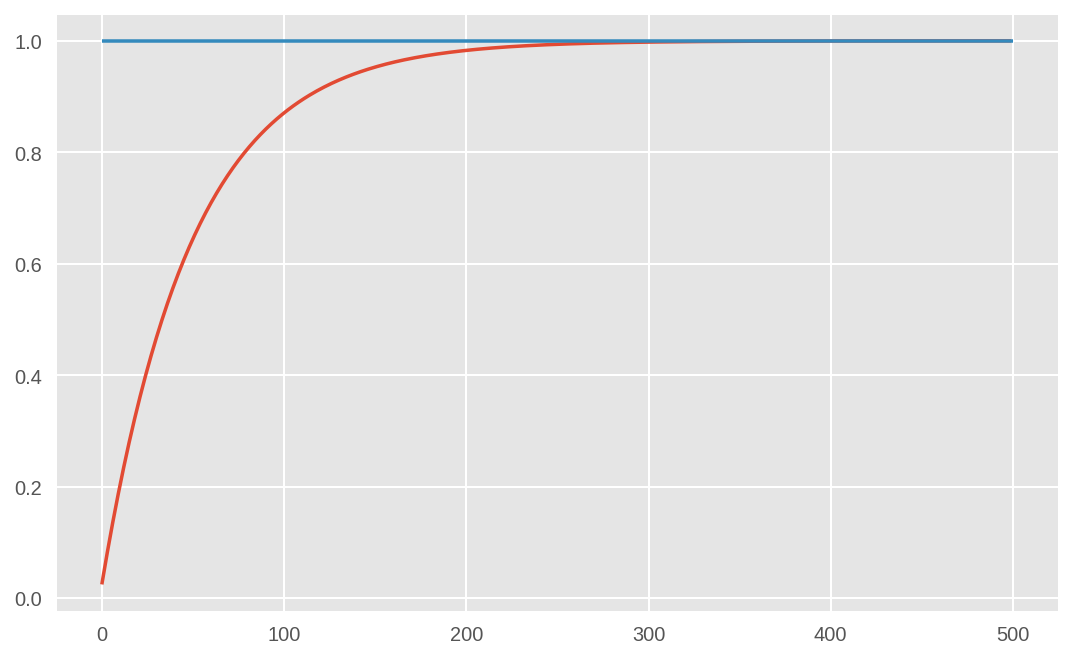

In [50]:
for i in range(500):
    with tf.GradientTape() as tape:
        y = (x-1)**2
        grad = tape.gradient(y,x)
        new_x = x - learning_rate*grad
        x.assign(new_x)
        history.append(x.numpy()[0])
       
plt.plot(history)
plt.plot([0,500], [1,1])
        

In [51]:
a = tf.constant(12)
counter = 0
while not tf.equal(a, 1):
  if tf.equal(a % 2, 0):
    a = a / 2
  else:
    a = 3 * a + 1
  print(a)

tf.Tensor(6.0, shape=(), dtype=float64)
tf.Tensor(3.0, shape=(), dtype=float64)
tf.Tensor(10.0, shape=(), dtype=float64)
tf.Tensor(5.0, shape=(), dtype=float64)
tf.Tensor(16.0, shape=(), dtype=float64)
tf.Tensor(8.0, shape=(), dtype=float64)
tf.Tensor(4.0, shape=(), dtype=float64)
tf.Tensor(2.0, shape=(), dtype=float64)
tf.Tensor(1.0, shape=(), dtype=float64)
